# 一组机构对一家上市公司的持仓历史变化

例如top20对冲基金对Amazon的持仓变化

In [83]:
import pandas as pd
import numpy as np
import glob,os
import math

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_rows',200)

In [4]:
file = glob.glob(os.path.join("13f-hr/000???????13F-HR??-??-20??.csv"))
print(len(file))

641


In [5]:
dl = []
for f in file:
    dlTemp = pd.read_csv(f, usecols=['Name of Issuer', 'CUSIP', 'Value', 'SHRS OR SH', 'Date', 'Filing Manager', 'CIK'])
    dlTop10 = dlTemp.sort_values(by='Value', ascending=False, ignore_index=True).head(5)
    dl.append(dlTemp)

dlTotal = pd.concat(dl, ignore_index=True)

In [6]:
# 统计高频持有的证券
print(dlTotal['Name of Issuer'].value_counts())
print(dlTotal['CUSIP'].value_counts())

WELLS FARGO & CO NEW              426
LIBERTY GLOBAL PLC                419
APPLE INC                         411
US BANCORP DEL                    305
FACEBOOK INC                      303
                                 ... 
American Air Grp Inc                1
ONCOBIOLOGICS  SHARES               1
Sprott Resource Lending             1
AEGERION  PHARMACEUTICALS  INC      1
PAGSEGURO DIGITAL LTD COM           1
Name: Name of Issuer, Length: 6546, dtype: int64
037833100    522
30303M102    462
949746101    458
023135106    440
191216100    363
            ... 
75040P405      1
52186N106      1
302438205      1
G36738105      1
59064RAA7      1
Name: CUSIP, Length: 4279, dtype: int64


In [14]:
dlApple = dlTotal[dlTotal['CUSIP'] == '037833100'].reset_index(drop=True)

In [15]:
dlApple

,Name of Issuer,CUSIP,Value,SHRS OR SH,Date,Filing Manager,CIK
0,Apple,037833100,8530,68005,2015-06-30,BAILLIE GIFFORD & CO,1088875
1,Apple,037833100,45661,364049,2015-06-30,BAILLIE GIFFORD & CO,1088875
2,Apple,037833100,91043,725875,2015-06-30,BAILLIE GIFFORD & CO,1088875
3,APPLE INC,037833100,11587,121200,2016-06-30,"Bridgewater Associates, LP",1350694
4,APPLE INC,037833100,111995,710000,2018-12-31,Berkshire Hathaway Inc,1067983
...,...,...,...,...,...,...,...
517,APPLE INC,037833100,241083386,2184122,2014-12-31,LONE PINE CAPITAL LLC,1061165
518,APPLE INC,037833100,561240,1415378,2013-06-30,COATUE MANAGEMENT LLC,1135730
519,APPLE INC,037833100,70584,178005,2013-06-30,COATUE MANAGEMENT LLC,1135730
520,Apple,037833100,10155,54859,2018-06-30,BAILLIE GIFFORD & CO,1088875


In [ ]:
dlSelected = dlApple[['Value', 'Date', 'CIK']].groupby(['Date', 'CIK']).sum().reset_index()

In [76]:
dlSelectedCik = dlSelected.groupby(['CIK']).sum()['Value'].nlargest(5)
print(dlSelectedCik)
targetCik = list(dlSelectedCik.index)

CIK
1067983    991808961
1061165    241934303
1387322     41911566
1079114     15902714
1135730     12688349
Name: Value, dtype: int64


In [71]:
resSelected = dlSelected[dlSelected['CIK'].isin(targetCik)]

In [102]:
resFinal = resSelected.pivot_table(values='Value', index=resSelected.Date, columns='CIK', aggfunc='first')
resFinal = np.log10(resFinal*1000).fillna(0)
resFinal = resFinal.reset_index()

In [103]:
resForamt = resFinal.replace(23852922220, 23852922)
resForamt = resForamt.replace(regex=r'-03-31$', value='Q1').replace(regex=r'-06-30$', value='Q2').replace(regex=r'-09-30$', value='Q3').replace(regex=r'-12-31$', value='Q4')
resForamt


CIK,Date,1067983,1079114,1088875,1135730,1350694
0,2013Q2,0.000000,8.978072,8.998298,8.800596,6.597037
1,2013Q3,0.000000,9.058087,9.018296,8.323930,7.063371
2,2013Q4,0.000000,9.128774,9.065843,8.927464,7.365675
3,2014Q1,0.000000,9.047661,9.014332,8.086153,7.365956
4,2014Q2,0.000000,8.943695,8.903349,8.972322,7.725699
5,2014Q3,0.000000,8.965711,8.589570,9.027446,7.732329
6,2014Q4,0.000000,8.977669,8.106473,8.991953,7.457019
7,2015Q1,0.000000,8.966333,8.158610,8.980718,7.960028
8,2015Q2,0.000000,8.966592,8.162068,9.030210,7.823885
9,2015Q3,0.000000,9.112368,8.106259,8.875881,7.481672


In [104]:
# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(resForamt.iloc[:, 1:].max().max()*1.1)
y_interval = 1
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']  

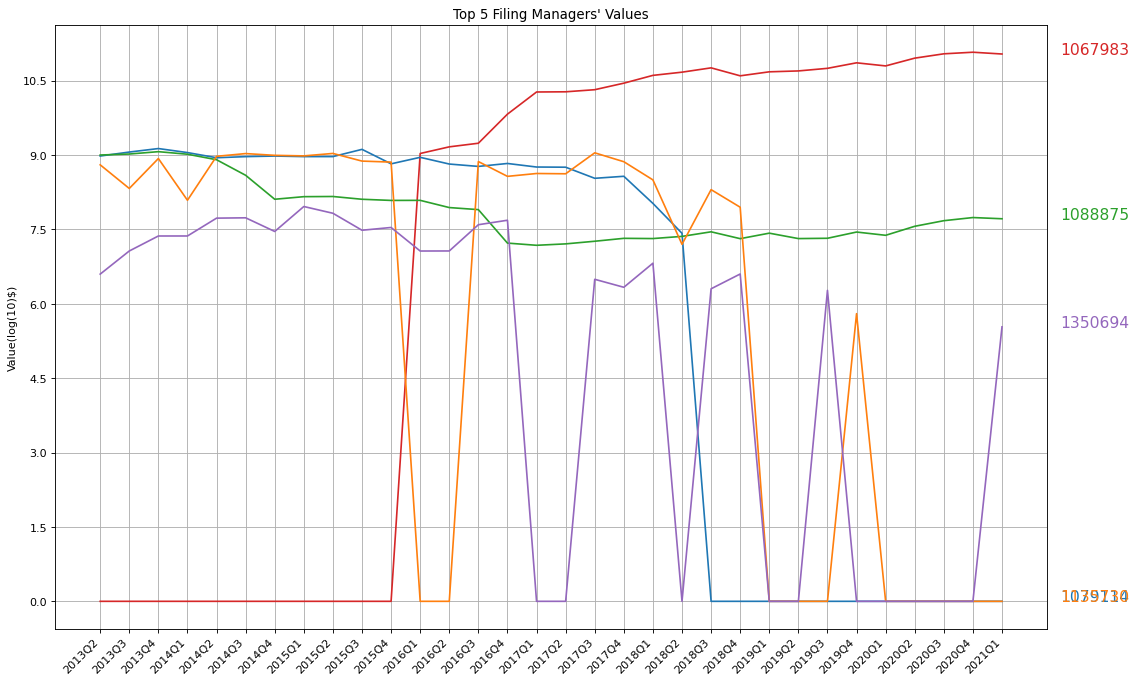

In [106]:
# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 10), dpi= 80)    

columns = resForamt.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(resForamt.Date.values, resForamt[column].values, lw=1.5, color=mycolors[i])    
    plt.text(resForamt.shape[0]+1, resForamt[column].values[-1], column, fontsize=14, color=mycolors[i])

ax.set(ylabel='Value(log(10)$)',
       title="Top 5 Filing Managers' Values")
ax.grid()

plt.xticks(rotation=45, horizontalalignment='right')
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10)) 

fig.savefig("Apple_Values.png")
plt.show()
